In [ ]:
# Импортируем модули и библиотеки

In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Предварительная обработка данных

In [ ]:
# посмотрим как выглядят изображения

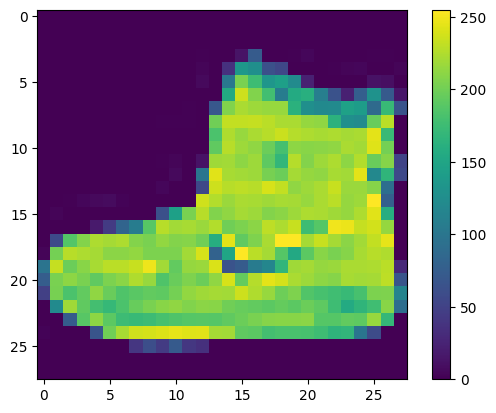

In [7]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [ ]:
# Нормализация данных

In [9]:
x_train = x_train / 255
x_test = x_test / 255

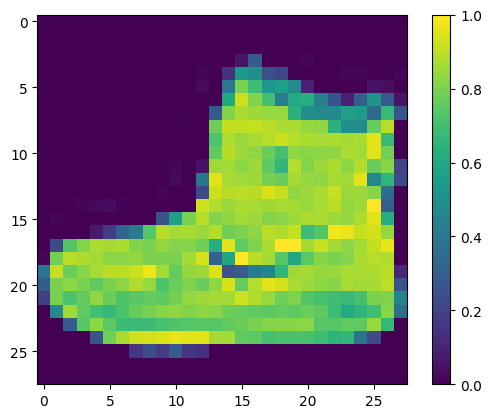

In [10]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [ ]:
# Посмотрим несколько изображений

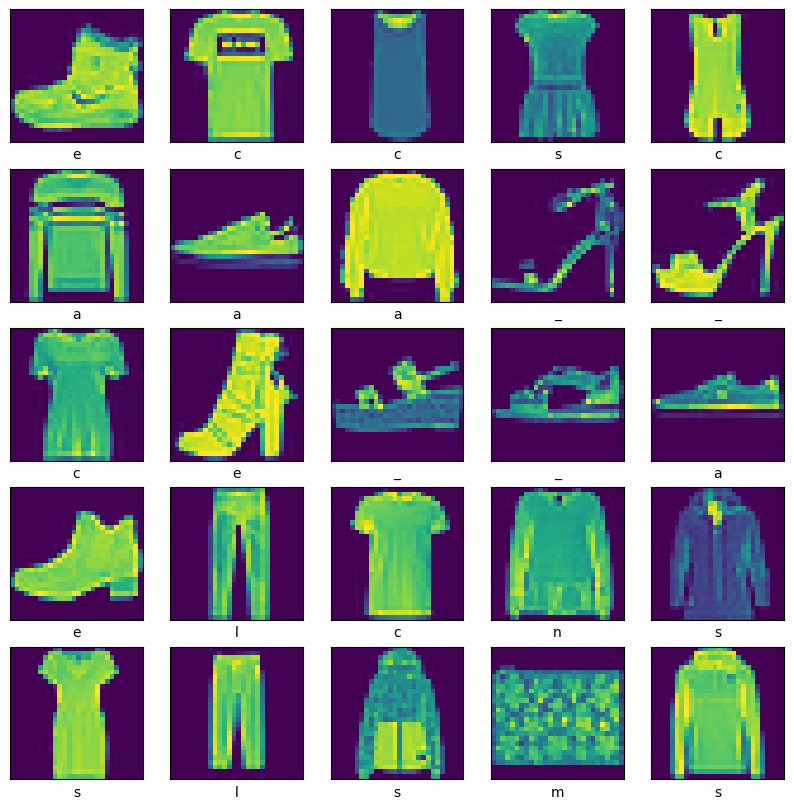

In [18]:
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel('class_names'[y_train[i]])

In [ ]:
# Создание нейронной сети

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Компиляция модели

In [30]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7471 - accuracy: 0.7603
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5153 - accuracy: 0.8247
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4702 - accuracy: 0.8373
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4439 - accuracy: 0.8463
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4264 - accuracy: 0.8518
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4116 - accuracy: 0.8577
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4008 - accuracy: 0.8589
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3906 - accuracy: 0.8640
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3820 - accuracy: 0.8667
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.374

In [33]:
tess_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuary')

313/313 [==============================] - 1s 2ms/step - loss: 0.4275 - accuracy: 0.8472
Test accuary


In [ ]:
#попредсказываем

In [35]:
predictions = model.predict(x_train)

1875/1875 [==============================] - 4s 2ms/step


In [41]:
predictions[24564]

array([5.3770295e-06, 5.6566188e-07, 1.0007045e-06, 2.1732726e-06,
       5.4183874e-07, 5.9337478e-02, 6.1646183e-06, 5.7585949e-01,
       2.2113752e-03, 3.6257574e-01], dtype=float32)

In [40]:
np.argmax(predictions[24564])

7

In [42]:
y_train[0]

9

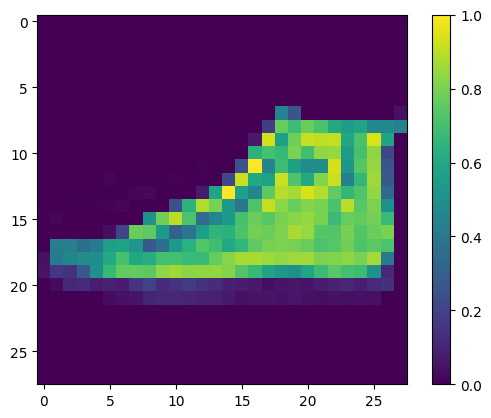

In [44]:
plt.figure()
plt.imshow(x_train[24564])
plt.colorbar()
plt.grid(False)